In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
import folium
df = pd.read_csv('./data/crime.csv')
year2018 = (df.REPORTED_DATE >= '2018-01-01') & (df.REPORTED_DATE < '2019-01-01')
data2018 = df[(year2018) & (df.DISTRICT_ID == 2) & (df.OFFENSE_CATEGORY_ID =='public-disorder')]
idx = data2018['GEO_LAT'].isna() | data2018['GEO_LON'].isna()
data2018 = data2018[~idx]
m = folium.Map(location=[39.76,-105.02], tiles='Stamen Toner',zoom_start=13, control_scale=True)
from folium.plugins import MarkerCluster
mc = MarkerCluster()
for each in data2018.iterrows():
    mc.add_child(folium.Marker(location = [each[1]['GEO_LAT'],each[1]['GEO_LON']]))
m.add_child(mc)
display(m)

In [11]:
df.FIRST_OCCURRENCE_DATE = pd.to_datetime(df.FIRST_OCCURRENCE_DATE)
df["YEAR"] = df.FIRST_OCCURRENCE_DATE.dt.year
crimes_df = df[df.IS_CRIME==1]
crimes_df = crimes_df.dropna(subset=['GEO_LAT', 'GEO_LON'])
robbery_df = crimes_df[(crimes_df.OFFENSE_CATEGORY_ID=='robbery') & (crimes_df.YEAR==2019)]
denver_map = folium.Map(location=[39.72378, -104.899157],
                       zoom_start=12,tiles='OpenStreetMap')
for i in range(len(robbery_df)):
    lat = robbery_df.iloc[i]['GEO_LAT']
    long = robbery_df.iloc[i]['GEO_LON']
    popup_text = """Neighborhood: {}<br>
                    Date Occurred: {}<br>""".format(crimes_df.iloc[i]['NEIGHBORHOOD_ID'],
                                               crimes_df.iloc[i]['FIRST_OCCURRENCE_DATE'])
    folium.CircleMarker(location=[lat, long], popup=popup_text, radius=8, color='blue', fill=True).add_to(denver_map)
denver_map


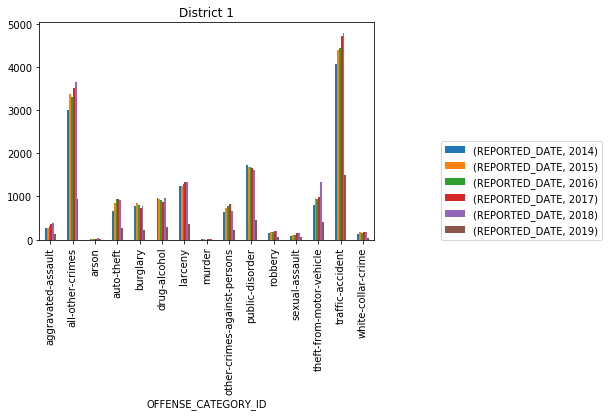

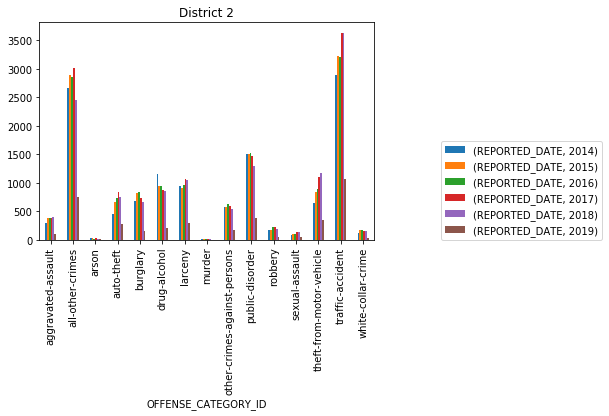

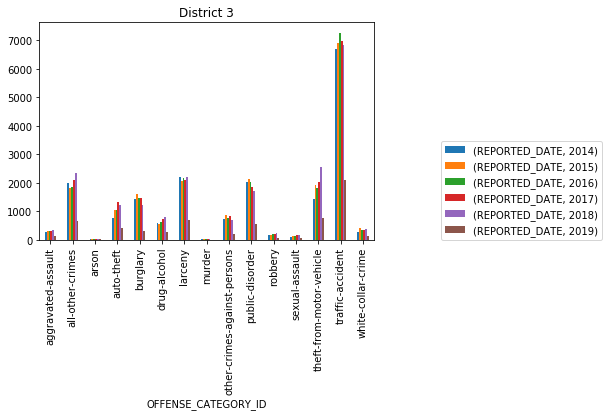

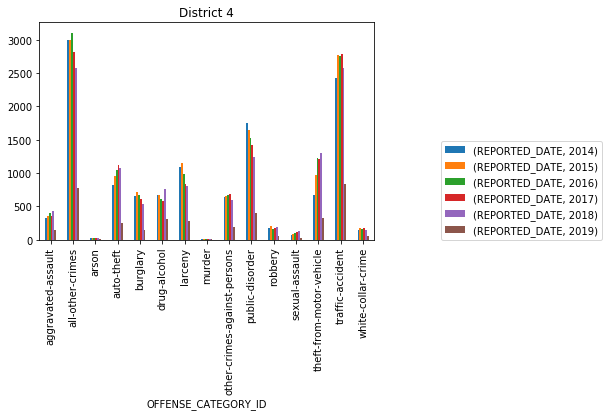

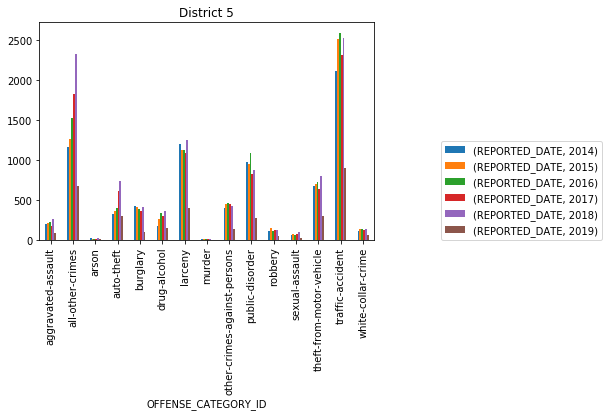

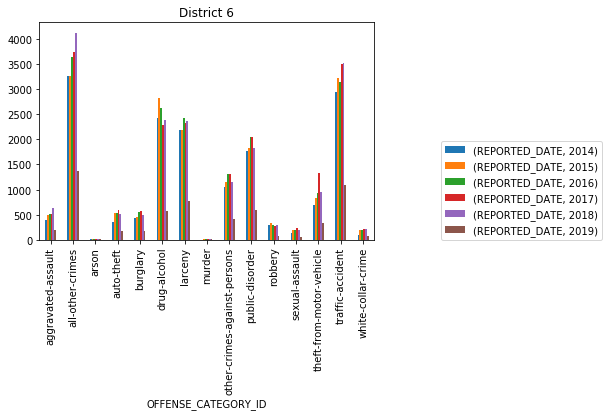

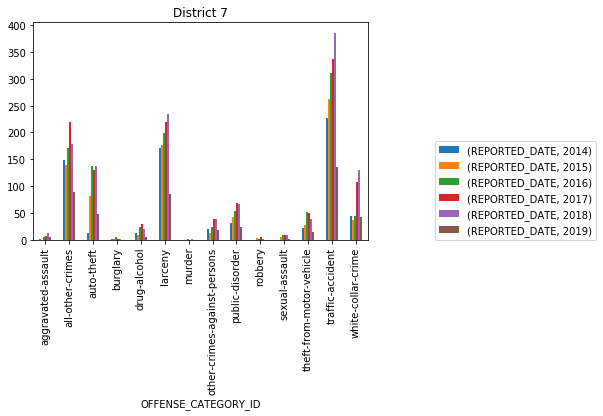

In [12]:
#convert relevant column data into datetime objects
df['REPORTED_DATE']=pd.to_datetime(df.REPORTED_DATE)
df['FIRST_OCCURRENCE_DATE']=pd.to_datetime(df.FIRST_OCCURRENCE_DATE)
df['LAST_OCCURRENCE_DATE']=pd.to_datetime(df.LAST_OCCURRENCE_DATE)

#crime breakdown within each district
temp=df[['REPORTED_DATE','DISTRICT_ID','OFFENSE_CATEGORY_ID']]
for district in range(1,8):
    temp2=temp[temp['DISTRICT_ID']==district].drop('DISTRICT_ID',axis=1)
    temp2=temp2.groupby([temp2.REPORTED_DATE.dt.year,temp2.OFFENSE_CATEGORY_ID]).agg('count')
    temp2=temp2.unstack(level=0).plot(kind='bar').legend(loc=(1.2,0))
    plt.title('District '+str(district))
    plt.show()

In [13]:
data_IS_TRAFFIC=df[df.IS_TRAFFIC==1]
print(data_IS_TRAFFIC.head())

    INCIDENT_ID       OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
8     201870833  201870833540100          5401                       0   
19    201871381  201871381544100          5441                       0   
21    201869050  201869050544100          5441                       0   
22    201872028  201872028540100          5401                       0   
43    201871958  201871958544100          5441                       0   

                 OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID FIRST_OCCURRENCE_DATE  \
8   traffic-accident-hit-and-run    traffic-accident   2018-01-30 09:10:00   
19              traffic-accident    traffic-accident   2018-01-30 12:38:00   
21              traffic-accident    traffic-accident   2018-01-29 14:16:00   
22  traffic-accident-hit-and-run    traffic-accident   2018-01-30 15:45:00   
43              traffic-accident    traffic-accident   2018-01-30 16:39:00   

   LAST_OCCURRENCE_DATE       REPORTED_DATE               INCIDENT_ADDRESS  \
8       

In [19]:
from datetime import datetime
df['REPORTED_DATE']=df.REPORTED_DATE.apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df['year']=df.REPORTED_DATE.apply(lambda x:x.strftime('%Y'))
df['month']=df.REPORTED_DATE.apply(lambda x:x.strftime('%m'))
df['hour']=df.REPORTED_DATE.apply(lambda x:x.strftime('%H'))
data_IS_TRAFFIC=data_IS_TRAFFIC[:2000]
colors = {'2014' : 'red', '2015' : 'blue','2016' :'green','2017':'brown','2018':'plum','2019':'purple'}
Long=data_IS_TRAFFIC.GEO_LON.mean()
Lat=data_IS_TRAFFIC.GEO_LAT.mean()
data_IS_TRAFFIC_map=folium.Map([Lat,Long],zoom_start=12)
for i in range(len(data_IS_TRAFFIC.groupby(['GEO_LAT','GEO_LON'])['INCIDENT_ID'].agg('count').index)):
    lat,lon=data_IS_TRAFFIC.groupby(['GEO_LAT','GEO_LON'])['INCIDENT_ID'].agg('count').index[i]
    folium.Circle(location=[lat,lon],
    popup=data_IS_TRAFFIC.iloc[i]['OFFENSE_TYPE_ID'],
    radius=int(data_IS_TRAFFIC.groupby(['GEO_LAT','GEO_LON'])['INCIDENT_ID'].agg('count')[i])*70,
    fill=True,
    fill_color=colors[data_IS_TRAFFIC['year'].iloc[i]],
    fill_opacity=0.7,).add_to(data_IS_TRAFFIC_map)

data_IS_TRAFFIC_map

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'